# DataCamp Associate Data Analyst Case Study Project - Food Claims Process
> **BY ABDULRAHEEM BASHIR**

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#import">Importing required files and libraries</a></li>
<li><a href="#invest">Data Inspection</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#check">Sanity Check After Data Cleaning</a></li>
<li><a href="#explore">Data Exploration</a></li>
<li><a href="#con">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This case study is about a fast food restaurant in Brazil where consumers file claims against such as food poisoning. Vivendo fast food is the name of the fast food to be used in this case study.

Vivendo is a fast food chain in Brazil with over 200 outlets. As with many fast food establishments, customers make claims against the company. For example, they blame Vivendo for suspected food poisoning.

The legal team, who processes these claims, is currently split across four locations. The new head of the legal department wants to see if there are differences in the time it takes to close claims across the locations.

**Customer Question:** The legal team would like you to answer the following questions:
- How does the number of claims differ across locations?
- What is the distribution of time to close claims?
- How does the average time to close claims differ by location?

**Dataset:** The dataset contains one row for each claim. The dataset can be downloaded from [here](https://s3.amazonaws.com/talent-assets.datacamp.com/claims.csv).

The following are the dataset descriptions:
- **Claim ID:** Character, the unique identifier of the claim.
- **Time to Close:** Numeric, number of days it took for the claim to be closed.
- **Claim Amount:** Numeric, initial claim value in the currency of Brazil.
- **Amount Paid:** Numeric, total amount paid after the claim closed in the currency of Brazil.
- **Location:** Character, location of the claim, one of “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”.
- **Individuals on Claim:** Numeric, number of individuals on this claim.
- **Linked Cases:** Binary, whether this claim is believed to be linked with other cases, either TRUE or FALSE.
- **Cause:** Character, the cause of the food poisoning injuries, one of ‘vegetable’, ‘meat’, or ‘unknown’.

<a id='import'></a>
## Importing required files and libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading the csv file
# saving it as a dataframe with the name claims

claims = pd.read_csv('claims.csv')

<a id='invest'></a>
## Data Inspection
> In this section, The data will be checked for quality and tidiness issues.

In [3]:
# displaying few top rows from the dataframe

claims.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


The preceding output shows that:
- The Claim ID column contains some undesired zeros. It also includes two pieces of information in this single column: the Claim ID and the Year of Claim.
- Some unwanted characters appear before the amount in the Claim Amount column.
- The Cause column has some empty values.

In [4]:
# displaying some information about the dataframe

claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


The preceding output shows that:
- The datatype for the Claim Amount column is not accurate.
- Approximately 80% of the Cause column entries are null.

In [5]:
# Checking for the count of duplicates in the dataframe
claims.duplicated().sum()

0

It appears above that there is no duplicate in the dataframe.

In [6]:
# displaying some descriptive statistic abput the data

claims.describe()

,Time to Close,Amount Paid,Individuals on Claim
count,98.000000,98.000000,98.000000
mean,832.346939,58448.238571,4.908163
std,686.851131,87525.873849,7.292259
min,-57.000000,999.680000,0.000000
25%,340.750000,15965.642500,1.000000
50%,638.500000,29451.040000,2.000000
75%,1138.750000,52114.760000,5.750000
max,3591.000000,558725.770000,41.000000


According to the above output, the minimal time to close a claim is -57, which is unusual because there are no negative days in real life.

In [7]:
# Checking for the rows in time_to_close column with negative value
claims[claims['Time to Close'] <= 0]

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
58,0000000-00.2019.0.00.0079,-57,"R$3,672.00",999.68,SAO LUIS,0,False,NaN


According to the output, this could be an insert mistake because only one of the values has a negative integer.

<a id='clean'></a>
## Data Cleaning
> In this stage, the data will be cleaned up based on the observations made in the inspection section above, in order to prepare it for analysis.

The following data cleansing tasks will be carried out in the following columns:
- Substitute underscore ( _ ) for the space in the column names.
- Remove unwanted zeros from the claim_ID Column.
- Create Year_of_Claim column from the claim_ID Column.
- Remove the unwanted characters thet appear before the amount in the Claim_Amount column.
- Change the datatype of Claim_Amount to integer.
- Replace the null entries in the Cause column with the word 'unknown'.
- Remove the negetive from -57 in the time_to_close column.
- Create Year_of_Claim column from time_to_close column.

In [8]:
# using .replace method to Substitute underscore ( _ )
# for the space in the column names.

claims.columns = claims.columns.str.replace(' ','_')

In [9]:
# using slicing to Create Year of Claim column
# from the claim ID Column.

claims['Year_of_Claim'] = claims.Claim_ID.str[11:15]

In [10]:
# using slicing to select the id number from the claim ID Column
# and then assign it back to the column
# this is to remove unwanted characters from the column

claims['Claim_ID'] = claims.Claim_ID.str[-4:]

In [11]:
# using slicing to remove the unwanted characters
# thet appear before the amount in the Claim Amount column
# also removing the comma in between amount
# and then assign it back to the column

claims['Claim_Amount'] = claims.Claim_Amount.str[2:-3].str.replace(',','')

In [12]:
# used .astype to change the datatype of Claim_Amount and
# Year_of_Claim column to integer

claims['Claim_Amount'] = claims['Claim_Amount'].astype('int64')

In [13]:
# used .fillna to replace all null entries in the Cause column
# with the word 'unknown'

claims['Cause'].fillna('unknown', inplace=True)

In [14]:
# Remove the negetive from -57 in the timetoclose column.

claims['Time_to_Close'] = claims.Time_to_Close.astype('str').str.replace('-','').astype('int64')

In [15]:
# Decoding the days in time_to_close column to years
# and then storing it in a list years

years = []

def append_value(days):
    years.append(days)

for day in claims['Time_to_Close']:
    if day <= 365:
        append_value('Within a Year')
    elif day <= 730:
        append_value('Within 2 Years')
    elif day <= 1095:
        append_value('Within 3 Years')
    elif day <= 1460:
        append_value('Within 4 Years')
    elif day <= 1825:
        append_value('Within 5 Years')
    else:
        append_value('6 Years and above')

In [16]:
# Using the values in years list to create the years
# it takes to close a claim

claims['Years_to_Close'] = years

<a id='check'></a>
## Sanity Check After Data Cleaning
> In this section, I'll double-check the structure before moving on to analysis. To determine whether or not the necessary adjustment has been made.

In [17]:
# displaying few top rows from the dataframe

claims.head()

,Claim_ID,Time_to_Close,Claim_Amount,Amount_Paid,Location,Individuals_on_Claim,Linked_Cases,Cause,Year_of_Claim,Years_to_Close
0,0094,2082,50000,34297.47,RECIFE,2,False,unknown,2010,6 Years and above
1,0086,3591,180000,56383.54,SAO LUIS,7,False,unknown,2011,6 Years and above
2,0092,2997,70000,12366.76,SAO LUIS,3,False,vegetables,2012,6 Years and above
3,0096,1143,95104,29217.16,FORTALEZA,4,False,unknown,2013,Within 4 Years
4,0097,117,29000,12610.50,FORTALEZA,1,False,meat,2014,Within a Year


In [18]:
# displaying some information about the dataframe

claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim_ID              98 non-null     object 
 1   Time_to_Close         98 non-null     int64  
 2   Claim_Amount          98 non-null     int64  
 3   Amount_Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals_on_Claim  98 non-null     int64  
 6   Linked_Cases          98 non-null     bool   
 7   Cause                 98 non-null     object 
 8   Year_of_Claim         98 non-null     object 
 9   Years_to_Close        98 non-null     object 
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 7.1+ KB


In [19]:
# displaying some descriptive statistic abput the data

claims.describe()

,Time_to_Close,Claim_Amount,Amount_Paid,Individuals_on_Claim
count,98.000000,98.000000,98.000000,98.000000
mean,833.510204,122952.030612,58448.238571,4.908163
std,685.424441,166433.389040,87525.873849,7.292259
min,29.000000,3555.000000,999.680000,0.000000
25%,340.750000,40000.000000,15965.642500,1.000000
50%,638.500000,58454.500000,29451.040000,2.000000
75%,1138.750000,136573.250000,52114.760000,5.750000
max,3591.000000,936540.000000,558725.770000,41.000000


The dataframe appears to be clean enough, and the structure appears to be adequate and ready for analysis.

<a id='explore'></a>
## Data Exploration
> In this section, I will respond to the legal team's business question, which will assist them determine whether there are differences in the time it takes to close claims across the locations.

**Customer Question**

- How does the number of claims differ across locations?
- What is the distribution of time to close claims?
- How does the average time to close claims differ by location?

### How does the number of claims differ across locations?

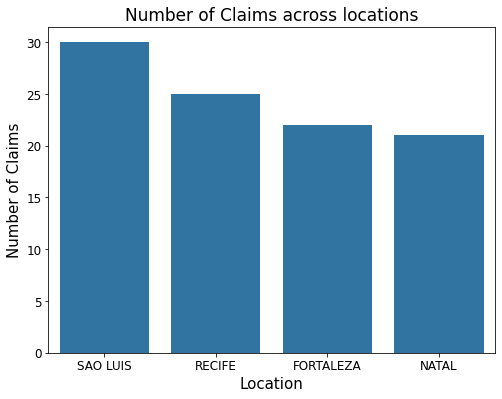

In [95]:
# Choosing a single color for the chart
color = sns.color_palette()[0]
# Organizing the chart's order from highest to lowest.
order = claims['Location'].value_counts().index

# Plotting the chart to answer the above Question
plt.figure(figsize = [8, 6])
ax = sns.countplot(data = claims, x ='Location', color = color, order = order);

# Format the plot's visual
plt.xticks(fontsize = 12)
plt.xlabel('Location', size = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Number of Claims', size = 15)
plt.title('Number of Claims across locations', size = 17);

**Insight**
- The Visualization above shows how the number of claims differ across locations.
- A column chart was used to answer the customers question because we are comparing values across few categories and the other of the categories is not important.
- From the chart, we can see that the city Sao Luis has the highest amount of claim (30), while the city Natal register the lowest Customers to make claim blaming Vivendo for suspected food poisoning.

### What is the distribution of time to close claims?

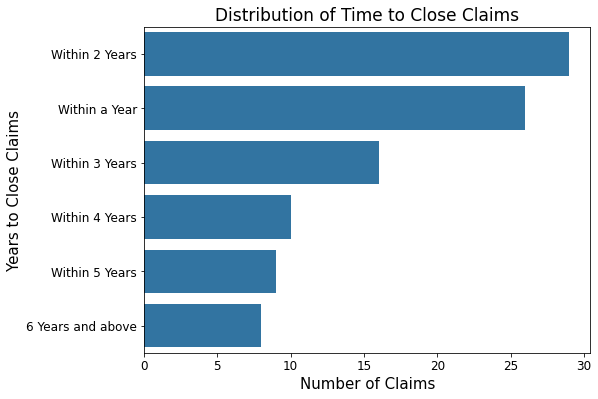

In [99]:
# Organizing the chart's order from highest to lowest.
order = claims['Years_to_Close'].value_counts().index

# Plotting the chart to answer the above Question
plt.figure(figsize = [8, 6])
ax = sns.countplot(data = claims, y ='Years_to_Close', color = color, order = order)

# Format the plot's visual
plt.xticks(fontsize = 12)
plt.xlabel('Number of Claims', size = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Years to Close Claims', size = 15)
plt.title('Distribution of Time to Close Claims', size = 17);

**Insight**
- The Visualization shows the distribution of time to close claims i.e. in this case, years it takes to close a claim because of the investigations that needs to be done after filing the claim.
- A Bar chart is used here because the values we are dealing with here has to do with duration, and also because the category text is long.
- From the chart we can see that majority of the claims (29) where closed within two years followed by 26 claims closed within a year.
- This translates that it takes less than or exactly two years to close the claim about the company (about 56% percent of the claims).
- This may imply that majority of the claims were false and that is why majority of the claims were closed early.